# Simulation of the particle-magnet magnetic interation

## System description

In the Water Treatment Plants (WTP), The remaining microplastic residues will be captured by structures combined with encapsulin and plastic-binding proteins (PBPs), which will have magnetic nanoparticles inside. This complex will be called MPBE-MP. After this capture, the MPBE-MP will be directed to an alternative path using an external magnetic field, generated by a magnet.

## Objectives

The aim of the simulation is to demonstrate the functioning of the system, given the respective physical values of reality.

## Metodology

- Create a class to the MPBE-$\mu$P
- Add in the arguments to instantiate the class, characteristics such as the magnetic dipole moment, the mass of the MPBE-$\mu$P and the initial position in $\hat{z}$.
- Add other properties of the class, such as acceleration and the initial speed of the MPBE-$\mu$P in $\hat{z}$.
- Add a movement method to the MPBE-$\mu$P class.
- Create a class to the system
- Add in the arguments to instantiate the class, characteristics such as magnetic field, water flow speed, water viscosity and pipe size.
- Create a system update method in the System class.
- Create an ilustration using MatplotLib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [2]:
def desenhar_particulas(ax, particle_list):
    particle_number = len(particle_list)
    circle = [None]*particle_number
    for i in range(particle_number):
        circle[i] = plt.Circle((particle_list[i].position[0], particle_list[i].position[1]), 0.1, color='black', lw=1.5, zorder=20)
        ax.add_patch(circle[i])

class MPBE_uP:
    def __init__(self, u, m, z0, vx, image):
        self.magnetic_moment = u
        self.mass = m
        self.position = np.array([0, z0])
        self.velocity = np.array([vx, 0])
        self.image = image
        
    def forces_y(self, magnet_position, mag_dip_magnet, viscosity):
        d = np.linalg.norm(self.position - magnet_position)
        magnetic_force_r = -self.magnetic_moment*mag_dip_magnet/(d**3)
        dx = self.position[0] - magnet_position[0]
        magnetic_force = (dx/d)*magnetic_force_r
        flow_force = viscosity*(self.velocity**2)
        
        resultant_force = magnetic_force + flow_force
        
        return resultant_force
    
    def uptade_velocities(self, dt, magnet_position, mag_dip_magnet, viscosity):
        F = self.forces_y(magnet_position, mag_dip_magnet, viscosity)
        # As the water flow is carrying the particles, they don't will change the velocity in x direction (apx)
        F[0] = 0
        self.velocity = self.velocity + (F/self.mass)*dt
        
        if self.position[1] - 0.2 <= 0:
            self.velocity[1] = 0
        return
    
    def __add__(self, dt):
        self.position = self.position + self.velocity*dt
        return

class Sistem:
    def __init__(self, m_x, u, vis, c_v, L, D, P_images, bg_image, mpbe_up_rate):
        self.magnet_position = m_x
        self.mag_dip_magnet = u
        self.viscosity = vis
        self.current_velocity = c_v
        self.height = L
        self.width = D
        self.platic_images = P_images
        self.background_images = bg_image
        self.mpbe_up_rate = mpbe_up_rate
        u, m, z0, vx = 1, 1, 4, 1
        self.particles = [MPBE_uP(u, m, z0, vx, P_images)]
        
    def main(self, dt, frame_period, n):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        
        ax.axis('equal')
        ax.axis([-1, 30, -1, 30])
        
        boxsize = self.height
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.set_xlim([0,boxsize])
        ax.set_ylim([0,boxsize])
        
        desenhar_particulas(ax, self.particles)
        magnet = plt.Circle((self.magnet_position[0], self.magnet_position[1]), 0.2, color='red', lw=1.5, zorder=20)
        ax.add_patch(magnet)
        plt.savefig(f'./GIF - magnet simulation/Image {n}.jpg', 
                transparent = False,  
                facecolor = 'white'
               )
        plt.close()
        
        for _ in range(frame_period):
            for particle in self.particles:
                particle + dt
                particle.uptade_velocities(dt, self.magnet_position, self.mag_dip_magnet, self.viscosity)

In [3]:
Particles_system = Sistem(np.array([1, 0]), 10, 0.01, 0.1, 10, 50, 0, 0, 0)

N = 200

for i in range(N):
    Particles_system.main(0.01, 5, i)

In [4]:
frames = []
for i in range(N):
    image = imageio.imread(f'./GIF - magnet simulation/Image {i}.jpg')
    frames.append(image)

In [5]:
imageio.mimsave('./simulation.gif', # output gif
                frames,          # array of input frames
                duration = 0.1)         # optional: frames per second

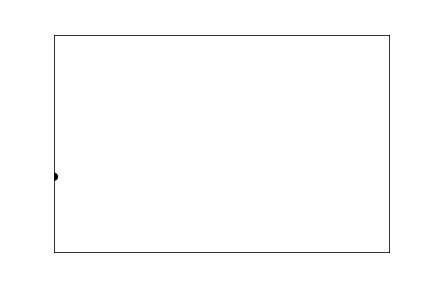

In [6]:
from IPython.display import display, Image

display(Image(filename='simulation.gif'))